In [70]:
import numpy as np
import pandas as pd
from xlsx2csv import Xlsx2csv
from io import StringIO
from datetime import datetime
import os
from glob import glob
from multiprocessing import Pool
from tqdm import tqdm
import logging
import seaborn as sns
import matplotlib.pyplot as plt
logging.basicConfig(level="WARNING")
import math

In [29]:
def read_excel(path: str, sheet_name: str = "Sheet1") -> pd.DataFrame:
    buffer = StringIO()
    Xlsx2csv(path, outputencoding="utf-8", sheet_name=sheet_name).convert(buffer)
    buffer.seek(0)
    df = pd.read_csv(buffer)
    return df

In [30]:
def load_data(paths, save_path=""):
    if os.path.exists(save_path):
        if save_path.endswith("feather"):
            print("loading feather")
            return pd.read_feather(save_path)
        elif save_path.endswith("csv"):
            print("loading csv")
            return pd.read_csv(save_path)
        else:
            raise ValueError("invalid save_path")
    try:
        dfs = list(map(read_excel, tqdm(paths)))
        df = pd.concat(dfs, ignore_index=True)
    except Exception as e:
        print(f"loading failed, check paths[]")
        raise e
    if save_path.endswith("feather"):
        df.to_feather(save_path)
    elif save_path.endswith("csv"):
        df.to_csv(save_path, index=None)
    else:
        raise ValueError("invalid save_path")
    return df

In [63]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Calculate the differences between the latitudes and longitudes
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Apply the Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Historique remplissage stations

In [31]:
hrs06 = load_data(
    glob("/Users/marcantoinelementec/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_06/*.xlsx"),
    save_path="data/hrs06.feather"
)

loading feather


In [32]:
hrs06

,Code station,Nom station,longitude,latitude,Date mise à jour,VM disponibles,VAE disponibles,VM indisponibles,VAE indisponibles,Nombre de diapasons disponibles,VM disponibles (Station +),VAE disponibles (Station +),VM indisponibles (Station +),VAE indisponibles (Station +),Nombre de cables disponibles (Station +)
0,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 00:02:00,0,1,0,0,16,0,0,0,0,NaN
1,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 00:29:00,0,2,0,0,15,0,0,0,0,NaN
2,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 00:32:00,0,1,0,0,16,0,0,0,0,NaN
3,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 02:45:00,0,2,0,0,15,0,0,0,0,NaN
4,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 03:03:00,0,1,0,0,16,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554169,92008,Hôtel de Ville de Nanterre,2.205549,48.892372,2023-06-28 20:41:00,7,5,0,0,26,0,0,0,0,NaN
6554170,92008,Hôtel de Ville de Nanterre,2.205549,48.892372,2023-06-28 21:17:00,7,4,0,0,27,0,0,0,0,NaN
6554171,92008,Hôtel de Ville de Nanterre,2.205549,48.892372,2023-06-28 21:41:00,8,4,0,0,26,0,0,0,0,NaN
6554172,92008,Hôtel de Ville de Nanterre,2.205549,48.892372,2023-06-28 21:49:00,7,4,0,0,27,0,0,0,0,NaN


# Régulation mouvements stations

In [6]:
rms02_06 = load_data(
    glob("/Users/marcantoinelementec/Downloads/14-Hackathon/03_Régulation_mouvements_stations/*/*.xlsx"),
    save_path="data/rms02_06.feather"
)
rms02_06

loading feather


,Nom station prise,Latitude station prise,Longitude station prise,Nom station dépose,Latitude station dépose,Longitude station dépose,Total,VAE,VM
0,Parc Pierre Lagravère,48.926505,2.239070,Porte de Saint-Ouen - Bessières,48.897922,2.328515,8,5,3
1,Porte de Saint-Ouen - Henri Huchard,48.898708,2.329536,Guy Môquet - Compoint,48.892136,2.323219,14,5,9
2,Hélène et François Missoffe - Emile Borel,48.899907,2.321544,Brochant - Clichy,48.890330,2.319731,14,8,6
3,Madeleine Vionnet,48.902519,2.374090,Cambrai - Benjamin Constant,48.895947,2.381134,13,7,6
4,Bineau - Louise Michel,48.886662,2.284327,Mairie du 16ème,48.863937,2.276595,15,11,4
...,...,...,...,...,...,...,...,...,...
2027,Rome - Provence,48.874230,2.325570,Pereire - Saussure,48.888229,2.310130,13,0,13
2028,Taitbout - La Fayette,48.873330,2.335263,Square Louise Michel,48.884687,2.344139,15,6,9
2029,Londres - Place d'Estienne d'Orves,48.876694,2.330536,Cimetière de Montmartre,48.886472,2.332890,15,4,11
2030,Danielle Casanova - Place Vendôme,48.868266,2.330484,Square Raymond Souplex,48.891837,2.335426,16,6,10


# Courses usagers

In [7]:
cu02_06 = load_data(
    glob("/Users/marcantoinelementec/Downloads/14-Hackathon/01_Courses_usagers/*/*.xlsx"),
    save_path="data/cu02_06.feather"
)
cu02_06

loading feather


,Numéro de Vélo,Assistance électrique,ID utilisateur,Date départ,Date arrivée,Distance parcourue en mètres,Durée en secondes,Vitesse maximum,Nom station départ,Latitude station départ,Longitude station départ,Statut station départ,Nom station arrivée,Latitude station arrivée,Longitude station arrivée,Statut station arrivée
0,2041,True,268867,2023-06-14 06:13:31,2023-06-14 06:21:23,1726,467,24,Tombe Issoire - René Coty,48.830513,2.334361,NORMALE,Odessa - Départ,48.842886,2.324428,VIDE
1,2041,True,9928,2023-06-14 09:27:47,2023-06-14 09:38:47,2251,659,22,Odessa - Départ,48.842886,2.324428,NORMALE,Estrapade - Ulm,48.845128,2.345457,NORMALE
2,2041,True,115605,2023-06-14 13:17:48,2023-06-14 13:29:51,2073,717,28,Estrapade - Ulm,48.845128,2.345457,NORMALE,Quai Voltaire,48.858943,2.331418,PLEINE
3,2041,True,74633,2023-06-14 15:33:56,2023-06-14 16:03:17,8716,1756,26,Quai Voltaire,48.858943,2.331418,PLEINE,Clef des Champs - Albert Dhalenne,48.914938,2.330665,NORMALE
4,2041,True,198213,2023-06-14 16:52:45,2023-06-14 17:05:43,2839,774,21,Clef des Champs - Albert Dhalenne,48.914938,2.330665,NORMALE,Stade de France,48.919142,2.362066,NORMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593644,67565,True,32925,2023-02-05 17:50:11,2023-02-05 18:15:52,6085,1536,26,Vieille du Temple - Francs Bourgeois,48.858256,2.358218,NORMALE,Grande Armée - Brunel,48.876116,2.288124,NORMALE
7593645,67565,True,62374,2023-02-05 18:25:22,2023-02-05 18:51:18,4422,1550,22,Grande Armée - Brunel,48.876116,2.288124,NORMALE,Caulaincourt - Place Constantin Pecqueur,48.889678,2.338179,NORMALE
7593646,67565,True,55252,2023-02-05 18:53:38,2023-02-05 19:23:05,2529,1764,29,Caulaincourt - Place Constantin Pecqueur,48.889678,2.338179,NORMALE,De Toqueville - Terrasse,48.882428,2.314002,NORMALE
7593647,67565,True,73052,2023-02-05 19:51:55,2023-02-05 20:06:17,3575,857,27,De Toqueville - Terrasse,48.882428,2.314002,NORMALE,Bosquet - Saint-Dominique,48.858652,2.303717,NORMALE


In [33]:
hrs06.loc[:, "timestamp"] = pd.to_datetime(hrs06["Date mise à jour"])

hrs06.loc[:, "hour"] = hrs06.timestamp.dt.hour

hrs06.loc[:, "date"] = hrs06.timestamp.dt.date

hrs06.loc[:, "station_id"] = hrs06["Code station"]


hrs06.loc[:, "total_dispo"] = hrs06["VAE disponibles"] + hrs06["VM disponibles"]

In [34]:
hrs06

,Code station,Nom station,longitude,latitude,Date mise à jour,VM disponibles,VAE disponibles,VM indisponibles,VAE indisponibles,Nombre de diapasons disponibles,VM disponibles (Station +),VAE disponibles (Station +),VM indisponibles (Station +),VAE indisponibles (Station +),Nombre de cables disponibles (Station +),timestamp,hour,date,station_id,total_dispo
0,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 00:02:00,0,1,0,0,16,0,0,0,0,NaN,2023-06-26 00:02:00,0,2023-06-26,1001,1
1,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 00:29:00,0,2,0,0,15,0,0,0,0,NaN,2023-06-26 00:29:00,0,2023-06-26,1001,2
2,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 00:32:00,0,1,0,0,16,0,0,0,0,NaN,2023-06-26 00:32:00,0,2023-06-26,1001,1
3,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 02:45:00,0,2,0,0,15,0,0,0,0,NaN,2023-06-26 02:45:00,2,2023-06-26,1001,2
4,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-26 03:03:00,0,1,0,0,16,0,0,0,0,NaN,2023-06-26 03:03:00,3,2023-06-26,1001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554169,92008,Hôtel de Ville de Nanterre,2.205549,48.892372,2023-06-28 20:41:00,7,5,0,0,26,0,0,0,0,NaN,2023-06-28 20:41:00,20,2023-06-28,92008,12
6554170,92008,Hôtel de Ville de Nanterre,2.205549,48.892372,2023-06-28 21:17:00,7,4,0,0,27,0,0,0,0,NaN,2023-06-28 21:17:00,21,2023-06-28,92008,11
6554171,92008,Hôtel de Ville de Nanterre,2.205549,48.892372,2023-06-28 21:41:00,8,4,0,0,26,0,0,0,0,NaN,2023-06-28 21:41:00,21,2023-06-28,92008,12
6554172,92008,Hôtel de Ville de Nanterre,2.205549,48.892372,2023-06-28 21:49:00,7,4,0,0,27,0,0,0,0,NaN,2023-06-28 21:49:00,21,2023-06-28,92008,11


# Aggregate data down to single station

In [10]:
hrs02_06 = pd.read_feather('data/hrs02_06.feather')

In [11]:
hrs02_06.loc[:, "timestamp"] = pd.to_datetime(hrs02_06["Date mise à jour"])

hrs02_06.loc[:, "hour"] = hrs02_06.timestamp.dt.hour

hrs02_06.loc[:, "date"] = hrs02_06.timestamp.dt.date

hrs02_06.loc[:, "station_id"] = hrs02_06["Code station"]


hrs02_06.loc[:, "total_dispo"] = hrs02_06["VAE disponibles"] + hrs02_06["VM disponibles"]

In [12]:
total = hrs02_06.groupby(["station_id", "date","hour"])["total_dispo"].mean().reset_index()

In [13]:
total["dayofweek"] = pd.to_datetime(total.date).dt.day_of_week
total

,station_id,date,hour,total_dispo,dayofweek
0,1001,2023-02-01,0,1.000000,2
1,1001,2023-02-01,3,2.000000,2
2,1001,2023-02-01,6,2.000000,2
3,1001,2023-02-01,7,2.000000,2
4,1001,2023-02-01,8,5.294118,2
...,...,...,...,...,...
1703787,92008,2023-06-30,21,13.000000,4
1703788,9999970,2023-06-14,10,0.000000,2
1703789,9999970,2023-06-15,0,0.000000,3
1703790,9999980,2023-06-14,10,0.000000,2


In [14]:
total_06 = hrs06.groupby(["station_id", "date","hour"])["total_dispo"].mean().reset_index()
total_06

,station_id,date,hour,total_dispo
0,1001,2023-06-01,0,0.625
1,1001,2023-06-01,1,0.000
2,1001,2023-06-01,2,1.000
3,1001,2023-06-01,3,1.400
4,1001,2023-06-01,5,1.000
...,...,...,...,...
911344,92008,2023-06-30,21,13.000
911345,9999970,2023-06-14,10,0.000
911346,9999970,2023-06-15,0,0.000
911347,9999980,2023-06-14,10,0.000


In [15]:
min_max_per_day = total_06.groupby(["station_id", "date"])["total_dispo"].agg(["min", "max"])
min_max_per_day

min        max
station_id date                            
1001       2023-06-01   0.000000  16.250000
           2023-06-02   1.000000  16.000000
           2023-06-03   1.222222  16.625000
           2023-06-04   0.333333  15.727273
           2023-06-05   1.461538  15.200000
...                          ...        ...
92008      2023-06-30  10.500000  20.000000
9999970    2023-06-14   0.000000   0.000000
           2023-06-15   0.000000   0.000000
9999980    2023-06-14   0.000000   0.000000
           2023-06-15   0.000000   0.000000

[42799 rows x 2 columns]

In [16]:
min_max_per_station =  min_max_per_day.reset_index().groupby(["station_id"])[["min","max"]].agg(["mean", "std"])
min_max_per_station

min                  max          
                 mean       std       mean       std
station_id                                          
1001         0.987514  0.614793  14.985702  1.893216
1002         0.667765  0.686160  18.588126  4.243716
1003         1.109788  0.867619  36.152277  3.866339
1006         1.070291  1.320531  27.673874  3.841667
1007         0.941010  0.688338  12.959531  1.280136
...               ...       ...        ...       ...
92006        1.024603  1.423698   9.590992  5.441978
92007        0.722222  1.703239  14.286944  6.459224
92008       11.056508  8.036218  17.757778  8.113184
9999970      0.000000  0.000000   0.000000  0.000000
9999980      0.000000  0.000000   0.000000  0.000000

[1437 rows x 4 columns]

<AxesSubplot:xlabel='hour,date'>

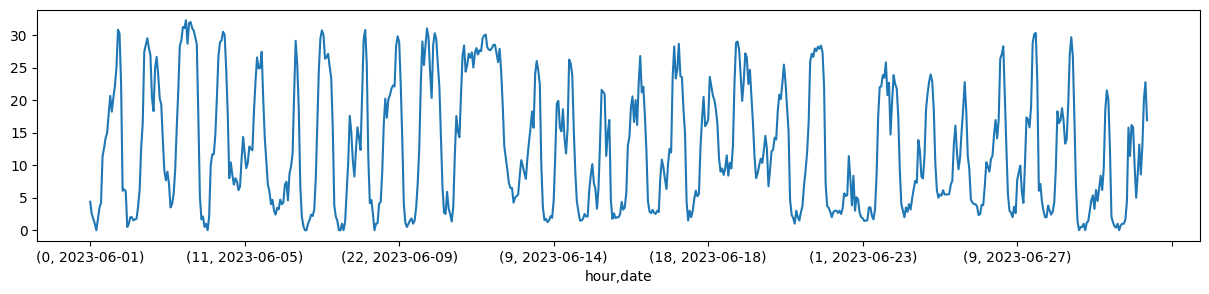

In [17]:
fig, ax = plt.subplots(figsize=(15,3))
total_06.query("station_id == 5121").set_index(["hour", "date"]).total_dispo.plot()

In [18]:
total_06["dayofweek"] = pd.to_datetime(total_06.date).dt.day_of_week
total_06

,station_id,date,hour,total_dispo,dayofweek
0,1001,2023-06-01,0,0.625,3
1,1001,2023-06-01,1,0.000,3
2,1001,2023-06-01,2,1.000,3
3,1001,2023-06-01,3,1.400,3
4,1001,2023-06-01,5,1.000,3
...,...,...,...,...,...
911344,92008,2023-06-30,21,13.000,4
911345,9999970,2023-06-14,10,0.000,2
911346,9999970,2023-06-15,0,0.000,3
911347,9999980,2023-06-14,10,0.000,2


Home station

<AxesSubplot:xlabel='hour', ylabel='total_dispo'>

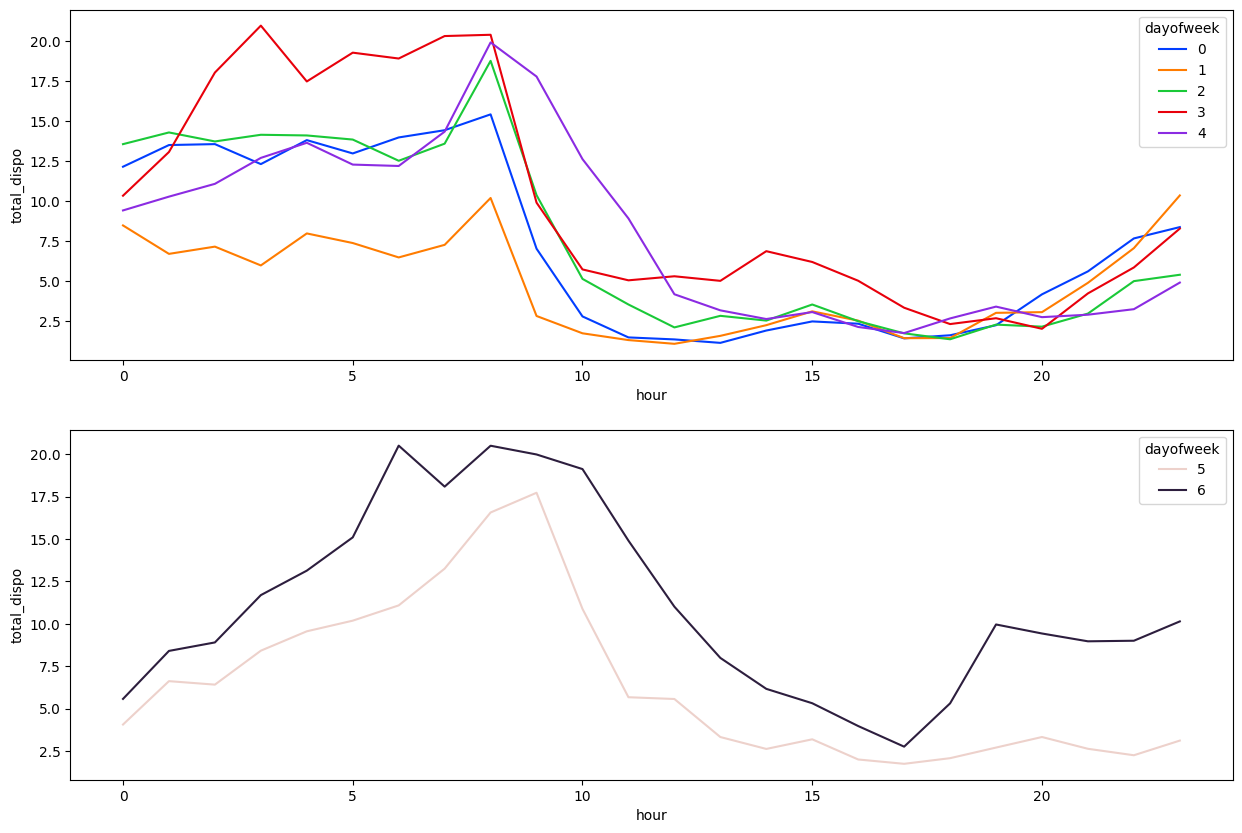

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))
sns.lineplot(ax=ax1,data=total_06.query("station_id == 14139 & dayofweek < 5"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None,palette="bright")
sns.lineplot(ax=ax2,data=total_06.query("station_id == 14139 & dayofweek > 4"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None)

Bars

<AxesSubplot:xlabel='hour', ylabel='total_dispo'>

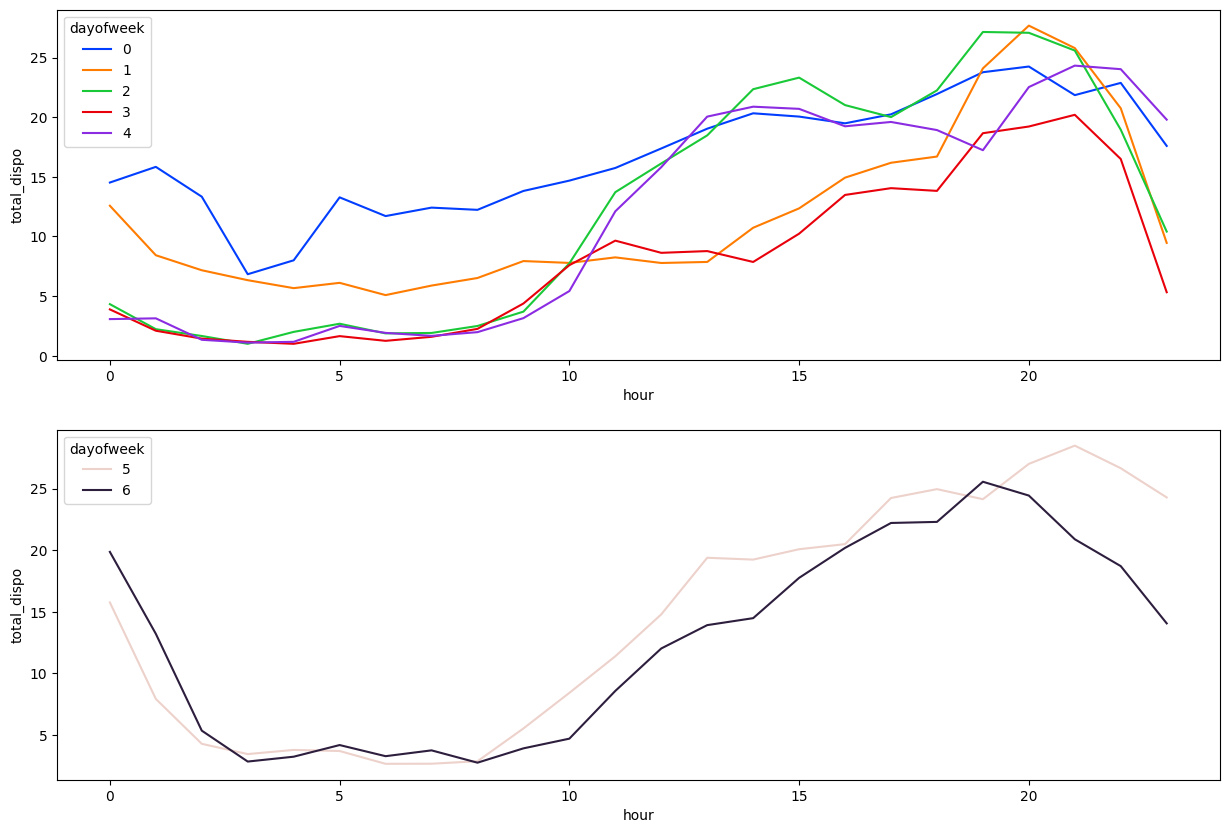

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))
sns.lineplot(ax=ax1,data=total_06.query("station_id == 5121 & dayofweek < 5"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None,palette="bright")
sns.lineplot(ax=ax2,data=total_06.query("station_id == 5121 & dayofweek > 4"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None)

University

<AxesSubplot:xlabel='hour', ylabel='total_dispo'>

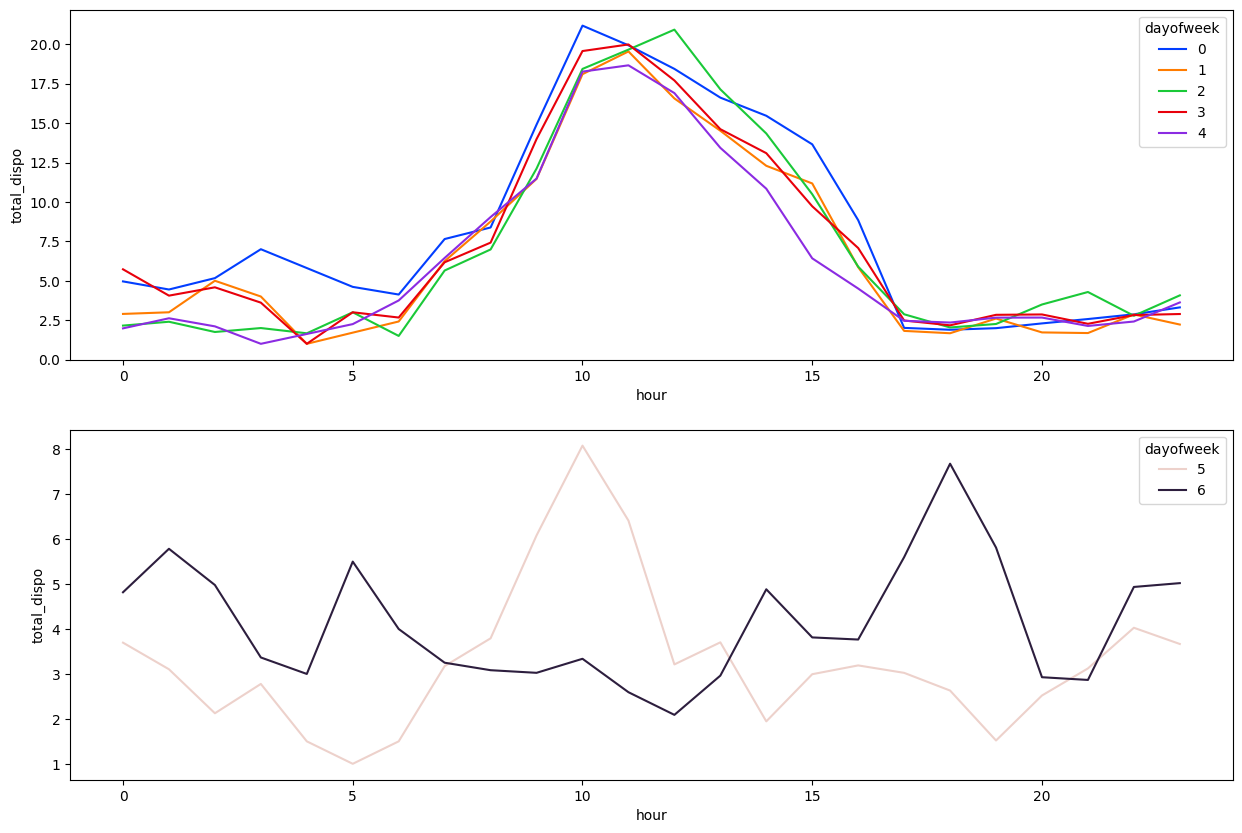

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))
sns.lineplot(ax=ax1,data=total_06.query("station_id == 5124 & dayofweek < 5"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None,palette="bright")
sns.lineplot(ax=ax2,data=total_06.query("station_id == 5124 & dayofweek > 4"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None)

La défense / Affaires

<AxesSubplot:xlabel='hour', ylabel='total_dispo'>

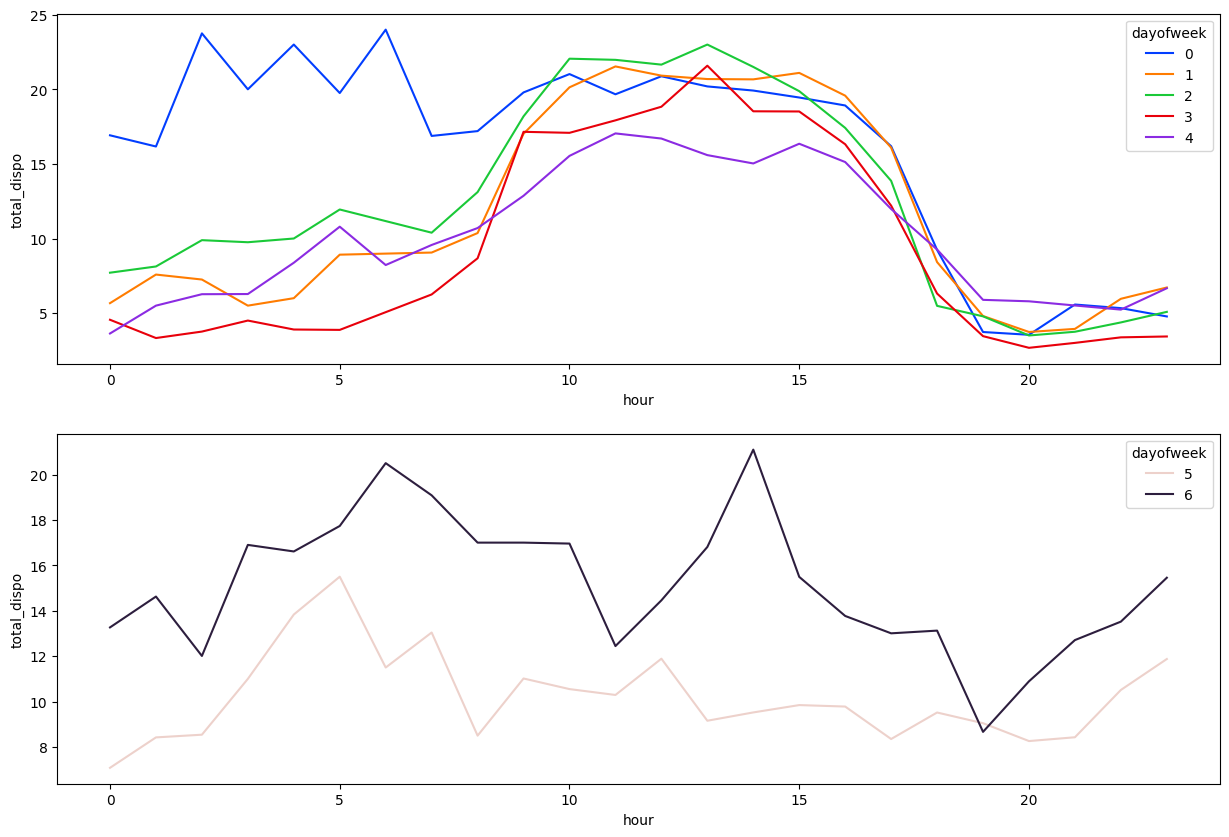

In [22]:
# La défense
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))
sns.lineplot(ax=ax1,data=total_06.query("station_id == 28005 & dayofweek < 5"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None,palette="bright")
sns.lineplot(ax=ax2,data=total_06.query("station_id == 28005 & dayofweek > 4"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None)

<AxesSubplot:xlabel='hour', ylabel='total_dispo'>

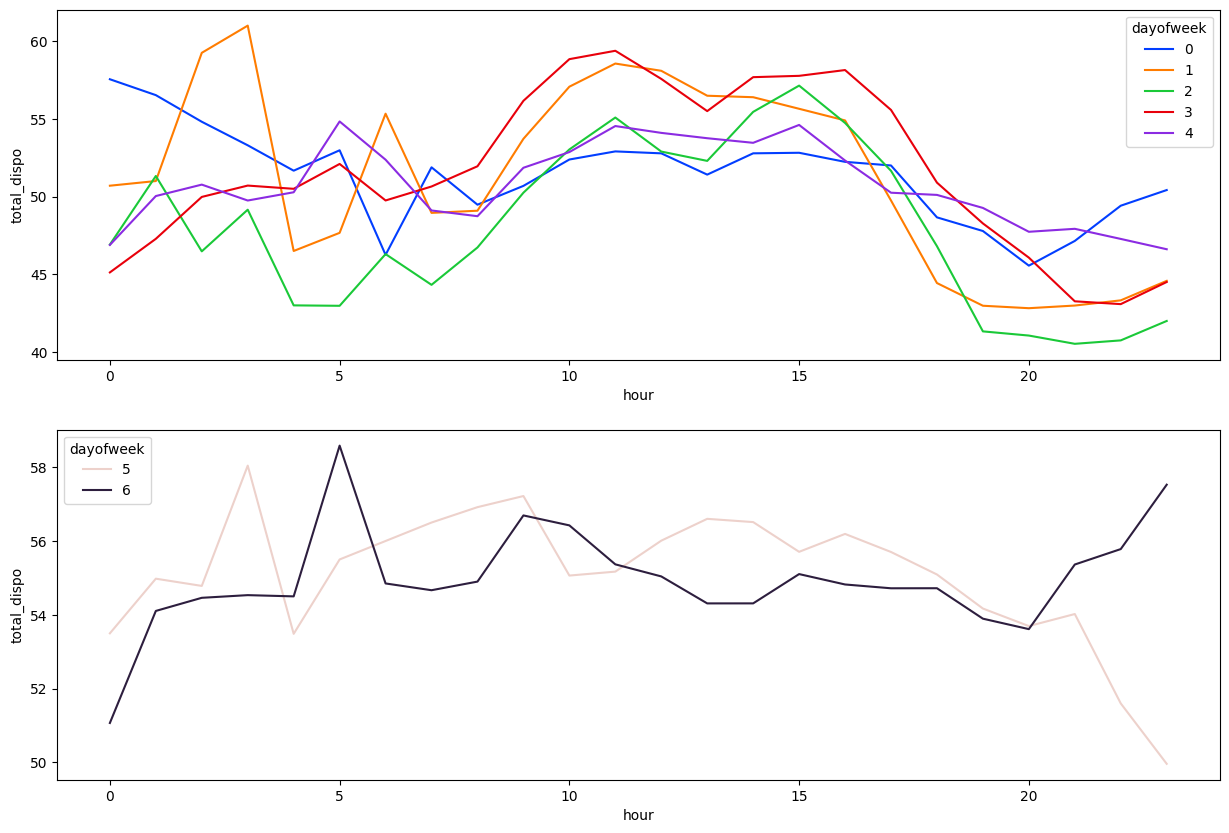

In [23]:
# Affaires

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))
sns.lineplot(ax=ax1,data=total_06.query("station_id == 13118 & dayofweek < 5"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None,palette="bright")
sns.lineplot(ax=ax2,data=total_06.query("station_id == 13118 & dayofweek > 4"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None)

<AxesSubplot:xlabel='hour', ylabel='total_dispo'>

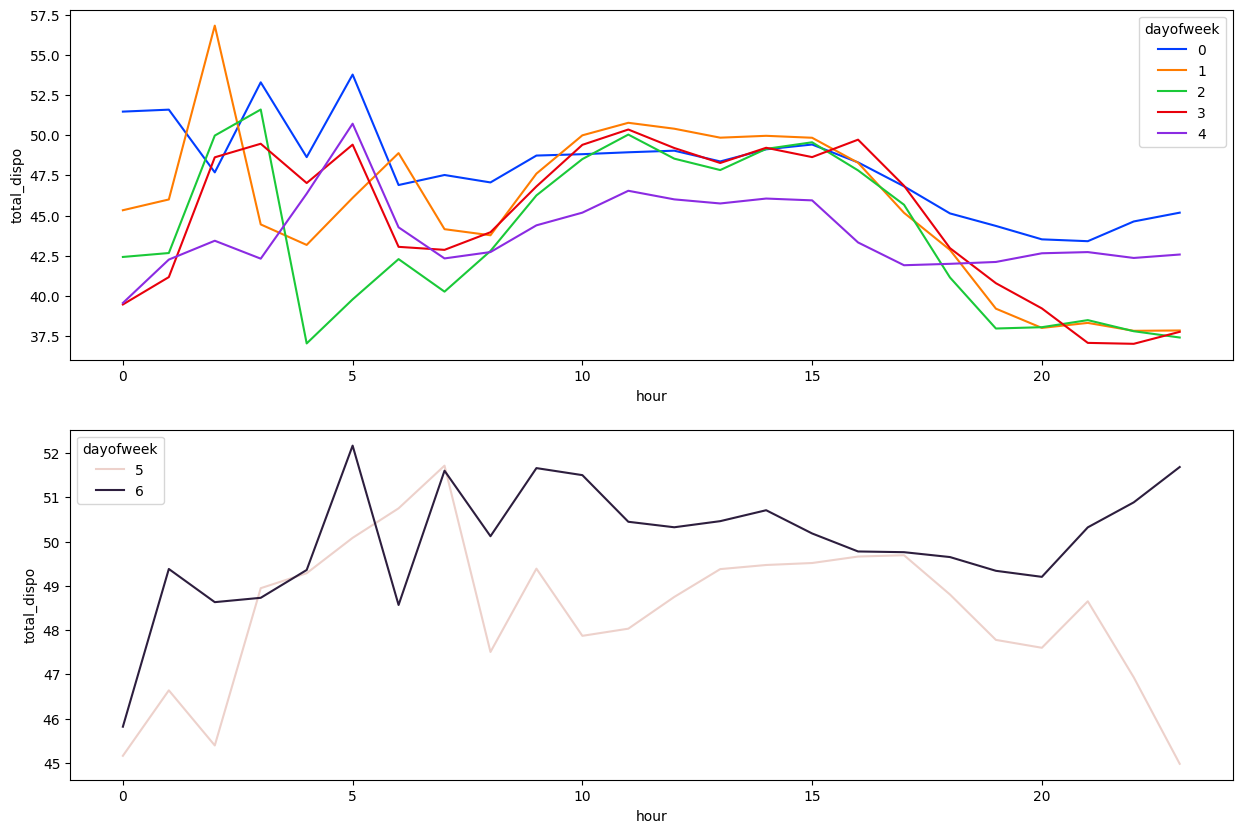

In [24]:
# Affaires feb & june

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))
sns.lineplot(ax=ax1,data=total.query("station_id == 13118 & dayofweek < 5"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None,palette="bright")
sns.lineplot(ax=ax2,data=total.query("station_id == 13118 & dayofweek > 4"  ), x="hour", y="total_dispo", hue="dayofweek",ci=None)

<AxesSubplot:xlabel='hour', ylabel='total_dispo'>

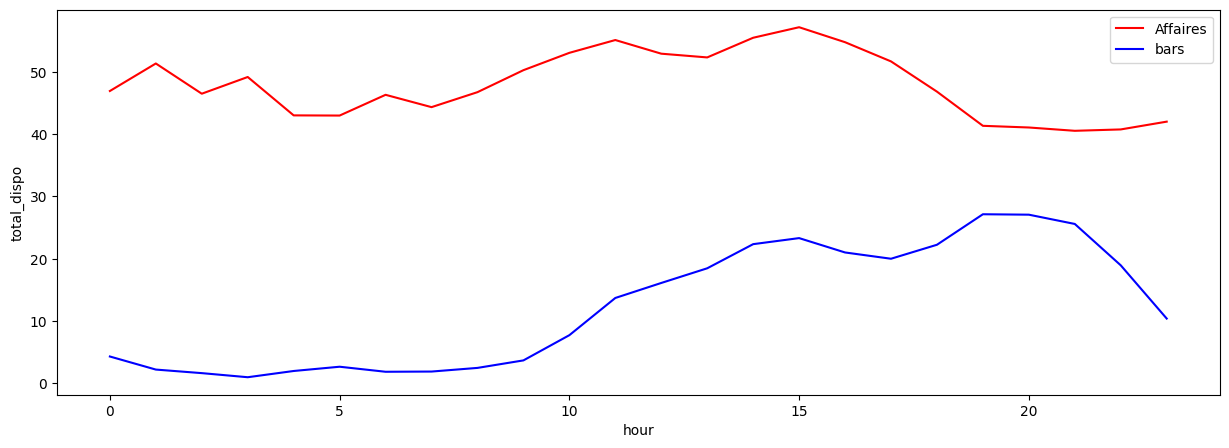

In [25]:
fig,ax1 = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
sns.lineplot(ax=ax1,data=total_06.query("station_id == 13118 & dayofweek == 2"  ), x="hour", y="total_dispo",ci=None,color = "red",label="Affaires") # affaires
sns.lineplot(ax=ax1,data=total_06.query("station_id == 5121 & dayofweek == 2"  ), x="hour", y="total_dispo",ci=None,color = "blue",label = "bars") # bars

In [58]:
coord_06 = hrs06.groupby('Code station').agg({'longitude':'first','latitude':'first'}).reset_index()

In [64]:
total06_coord= coord_06[['Code station','longitude','latitude']].merge(total_06, left_on='Code station',right_on='station_id')
total06_coord["station_id"] = total06_coord["Code station"]

In [67]:
total06_coord.query('station_id == 13118 or station_id == 5121')

,Code station,longitude,latitude,station_id,date,hour,total_dispo,dayofweek
80270,5121,2.347842,48.851905,5121,2023-06-01,0,4.375000,3
80271,5121,2.347842,48.851905,5121,2023-06-01,1,2.500000,3
80272,5121,2.347842,48.851905,5121,2023-06-01,2,1.750000,3
80273,5121,2.347842,48.851905,5121,2023-06-01,3,1.000000,3
80274,5121,2.347842,48.851905,5121,2023-06-01,4,0.000000,3
...,...,...,...,...,...,...,...,...
337225,13118,2.377065,48.824358,13118,2023-06-30,19,43.166667,4
337226,13118,2.377065,48.824358,13118,2023-06-30,20,33.466667,4
337227,13118,2.377065,48.824358,13118,2023-06-30,21,29.000000,4
337228,13118,2.377065,48.824358,13118,2023-06-30,22,26.785714,4


In [71]:
calculate_distance(48.851905,2.347842,48.824358,2.377065)

3.7358737393681563

In [ ]:
def get_load_empty_hours(total: pd.DataFrame):
    '''
    total:
        station_id  date        hour
        1001.0      2023-06-01  0.0      0.625
                                1.0      0.000
                                2.0      1.000
                                3.0      1.400
                                5.0      1.000
                                        ...  
        92008.0     2023-06-30  21.0    13.000
        9999970.0   2023-06-14  10.0     0.000
                    2023-06-15  0.0      0.000
        9999980.0   2023-06-14  10.0     0.000
                    2023-06-15  0.0      0.000
        Name: total_dispo, Length: 911349, dtype: float64
    '''
    total = total.reset_index()

    out = []
    for sid in tqdm(total.station_id.unique(), desc="station_id"):
        station_total =  total.query(f"station_id == {sid}")
        for date in station_total.date.unique():
            # logging.debug(date)
            desired_date = pd.Timestamp(date).date() 
            day_station_total = station_total[station_total['date'] == desired_date]
            # print(day_station_total.head())
            try:
                grad = day_station_total.total_dispo.agg(["gradient"]).values[0]
                # return grad, len(grad)
                # logging.debug(len(grad))
                index = day_station_total.hour.values
                load_hour = int(index[np.argmax(grad)])
                empty_hour = int(index[np.argmin(grad)])
                out.append(
                    {
                        "station_id": sid,
                        "date": date,
                        "load_hour": load_hour,
                        "empty_hour": empty_hour
                    }
                )
            except ValueError as e:
                # raise e
                out.append({
                    "station_id": sid,
                        "date": date,
                        "load_hour": None,
                        "empty_hour": None
                })
    return out

In [ ]:
out = get_load_empty_hours(total)

In [ ]:
load_unload_hours_all_days = pd.DataFrame(out)
load_unload_hours_all_days

In [ ]:
load_unload_hours = load_unload_hours_all_days.dropna().groupby("station_id")[["load_hour", "empty_hour"]].agg(["mean","std"])
load_unload_hours